# Machine Learning for Healthcare


# TASK 1

Length of stay prediction can be useful to hospitals for managing the limited number of beds. <br>
We will be using a dataset derived from MIMIC III dataset. <br>
Since our model estimates length of stay, we are solving a regression problem.

Import all the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
import seaborn as sns

Lets read the data from **task1.csv**

In [2]:
# Reading the data
df = pd.read_csv('task1.csv')

Lets have a look at the data

In [3]:
# Look at some of the top rows of the dataset
df.head()

,LOS,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,...,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
0,1.144444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,...,0,1,0,0,0,1,0,0,0,0
1,5.496528,0.0,4.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,1,0,0,0,1,0,0,0,0
2,6.768056,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,...,0,1,0,0,0,1,0,0,0,0
3,2.856944,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,3.534028,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0


We have to make sure each column is of numeric data-type i.e float or int <br>
This is because the algorithms require data to be in such format for training

In [4]:
# We look at the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51037 entries, 0 to 51036
Data columns (total 49 columns):
LOS                           51037 non-null float64
blood                         51037 non-null float64
circulatory                   51037 non-null float64
congenital                    51037 non-null float64
digestive                     51037 non-null float64
endocrine                     51037 non-null float64
genitourinary                 51037 non-null float64
infectious                    51037 non-null float64
injury                        51037 non-null float64
mental                        51037 non-null float64
misc                          51037 non-null float64
muscular                      51037 non-null float64
neoplasms                     51037 non-null float64
nervous                       51037 non-null float64
pregnancy                     51037 non-null float64
prenatal                      51037 non-null float64
respiratory                   51037 non-nul

Since all the columns are of numeric data-type, <br>
We view the descriptive statistics of the dataset.

In [5]:
df.describe()

,LOS,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,...,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
count,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,...,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000
mean,10.228510,0.370711,2.260007,0.077121,0.617591,1.175030,0.503968,0.308502,2.362698,0.428963,...,0.157572,0.533103,0.079060,0.056136,0.000294,0.412916,0.010052,0.232929,0.188726,0.098948
std,12.461440,0.652278,2.255679,0.357821,1.119265,1.345073,0.845481,0.670549,2.206709,0.856638,...,0.364343,0.498908,0.269835,0.230186,0.017141,0.492363,0.099753,0.422702,0.391295,0.298595
min,0.014583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.857639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.583333,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.805556,1.000000,4.000000,0.000000,1.000000,2.000000,1.000000,0.000000,3.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,294.660417,6.000000,16.000000,11.000000,11.000000,12.000000,7.000000,7.000000,23.000000,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**LOS** column is the target variable we have to predict. <br>
Separate the dataset into two. <br>
One with all the independent variables, other with target variable.

In [6]:
# Separate target and features variable
'''
LOS is the target variable
features contains independent variables
'''
LOS = df['LOS'].values
features = df.drop(columns=['LOS'])

Usually datasets contain NA values. <br>
We check if our data contains any NA's. <br>
If there are NA's, we drop those rows or fill them with a value(imputation)

In [7]:
# Check for any NaNs
'''
Run this code to keep rows having required percentage of non-NA column values

ratio_nonNA = 0.5
df.dropna(thresh=np.int(ratio_nonNA*(len(df.columns)/100),inplace=True)

The above code only keeps rows having atleast 50% non-NA values for columns
'''
df.isnull().values.sum()

0

Since there are no null values, we can split the data. <br>
We split the data into train and test datasets. <br>
Usually the split is done 80-20 or 70-30 ratio. <br>
We shall split it 80-20. <br>
We use ***sklearn.model_selection.train_test_split*** method that we imported earlier.

In [8]:
# Split data into training and testing dataset
'''
test_size = 0.2
This means that the test data is 20% of entire dataset

random_state = 5
This means that there if shuffling of the dataset before splitting
Setting random_state is equivalent to setting a seed
This is done so that we get the same result everytime we run the notebook
'''
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    LOS, 
                                                    test_size = .20, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 40829 samples.
Testing set has 10208 samples.


### Machine Learning

We train the following machine learning algorithms for this task: <br>
<ul>
    <li> Linear Regression
    <li> Linear Regression optimized with Stochastic Gradient Descent(SGD)
    <li> Gradient Boosting 
    <li> K-Nearest Neighbors
    <li> Random Forest
    <li> Support Vector Machine (SVM)
</ul>

This cell may take some time to run.

In [9]:
# Regression models for comparison
'''
models is a list containing the objects for ML algorithms.
results is a dictionary where key is algorithm name and value is MAE.
We train for each model and predict on test.
We use the ground truth and predictions to calculate MAE.
The MAE's for each model are stored in results.
'''
ml_models = [LinearRegression(),
          SGDRegressor(random_state = 0), 
          GradientBoostingRegressor(random_state = 0), 
          KNeighborsRegressor(),
          RandomForestRegressor(random_state = 0),
          SVR()]

results = {}

for model in ml_models:
    
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(x_train, y_train)
    
    # Make predictions with model
    y_test_preds = reg_model.predict(x_test)
    
    # Grab model name and store results associated with model
    name = str(model).split("(")[0]

    results[name] = mean_absolute_error(y_test, y_test_preds)
    print('{} done.'.format(name))

LinearRegression done.
SGDRegressor done.
GradientBoostingRegressor done.
KNeighborsRegressor done.
RandomForestRegressor done.
SVR done.


In [10]:
print('Mean Absolute Error')
for i in results.keys():
    print('{} : {}'.format(i,results[i]))

Mean Absolute Error
LinearRegression : 6.0925052200365215
SGDRegressor : 6.446881916451007
GradientBoostingRegressor : 5.587236700033559
KNeighborsRegressor : 5.773035037878787
RandomForestRegressor : 5.762952196367528
SVR : 5.251454298258676


We visualize the MAE of the models. <br>
We plot a barplot for each algorithm. <br>
The y-axis is MAE.

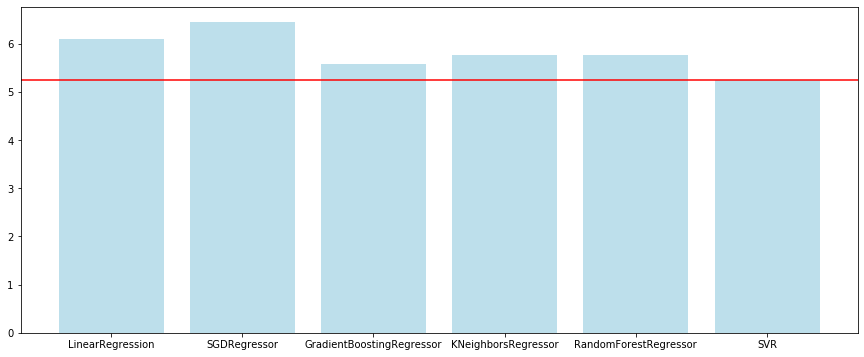

In [11]:
# Plot barplot for MAE
'''
This plot will show which model has least MAE
We get the least MAE with SVM Regression
'''
ind = range(len(results))
min_mae = min(results.values())

fig = plt.figure(figsize=(15,6))
ax = fig.subplots()
ax.bar(ind, list(results.values()), align='center', 
        color = 'lightblue', alpha=0.8)
plt.xticks(ind, results.keys())
ax.axhline(y=min_mae, xmin=0, xmax=100, ls='-', color='red')


plt.show()

SVM Regression gives us the least MAE of 5.25.

### Deep Learning

In [12]:
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras import models, regularizers, layers, optimizers, losses, metrics
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

We train a ***Feed Forward Neural Network***. <br>

We first initialize the network as a **Sequential model**. <br>
We add layers of different types and sizes to this Sequential model. <br>
Since this is a regression problem, we use **ReLu** as activation function for the output layer. <br>

The input shape of the input layer is (number of columns,). <br>

**Epochs** is the number of times training is done on the entire dataset. =20<br>
**Batch size** is the number of rows to be trained in one iteration. =8<br>
**Mean Absolute Error** is the metric used to optimize loss. <br>
**Dropout** is used to shut down a ratio of nodes in hidden layer in each iteration. =0.2<br>
**Learning Rate** is used to determine how much jump to be made during gradient descent. =10<sup>-4</sup><br>

The validation and test datasets are the same for this task.

In [13]:
rows = x_train.shape[0]
cols = x_train.shape[1]
input_shape = (cols,)

Training takes a considerable amount of time

In [14]:
# Training the network
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
# model.add(layers.BatchNormalization())
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='relu'))
print(model.summary())

# FIT / TRAIN model on training daa

NumEpochs = 20
BatchSize = 8

# Compile the model and fit it on the training data
model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='mean_absolute_error', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_test, y_test))

# Predicting on the test dataset
results = model.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and MAE")
print("results ", results)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              50176     
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0

The issue with neural networks is that it can overfit on the training data.<br>
This can result in bad estimation on the test data. <br>
In this case, epoch 12 gave the least ***MAE*** on the test set. <br>

Neural network gave the best performance of all models.

<br>
<br>
<br>

# TASK 2

With the medical sector moving towards value-based care. <br>
Value-based healthcare is a healthcare delivery model in which providers, including hospitals and physicians, are paid based on patient health outcomes. <br>
In this task, we predict the readmission for diabetic patients. <br>
The prediction can be 0 or 1. <br>
Since we are predicting 2 classes i.e yes or no, this is a binary classification. <br>



Let's load the data

In [15]:
df = pd.read_csv('task2.csv')

We repeat the same steps to check data as we did in Task1

In [16]:
# Look at some of the top rows of the dataset
df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Asian,race_Caucasian,...,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK,age_group,has_weight,OUTPUT_LABEL
0,1,41,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,3,59,0,18,0,0,0,9,0,1,...,0,0,0,0,0,0,1,10,0,0
2,2,11,5,13,2,0,1,6,0,0,...,0,0,0,0,0,0,1,20,0,0
3,2,44,1,16,0,0,0,7,0,1,...,0,0,0,0,0,0,1,30,0,0
4,1,51,0,8,0,0,0,5,0,1,...,0,0,0,0,0,0,1,40,0,0


In [17]:
# We look at the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99343 entries, 0 to 99342
Columns: 144 entries, time_in_hospital to OUTPUT_LABEL
dtypes: int64(144)
memory usage: 109.1 MB


There are 144 columns, hence it's not showing the column names <br>
We store column names in a list. <br>
We check for any NAs for each column

In [18]:
# Store column names in a list
col_names = list(df.columns)

In [19]:
# Checking for sum of NA's rows for each column and print only if it exists
flag = 0
for i in col_names:
    nas = df[i].isnull().sum()
    if nas>0:
        flag=1
        print('{} NAs in column: {}'.format(nas,i))

if flag==0:
    print('There are no NAs')

There are no NAs


Since we have no NA's, we now split the dataset. <br>
This time we split the data into 3 splits: <br>
    - Training samples: these samples are used to train the model
    - Validation samples: these samples are held out from the training data and are used to make decisions on how to improve the model
    - Test samples: these samples are held out from all decisions and are used to measure the generalized performance of the model

This is usually a better splitting method compared to just Test and Train. <br>
We will be using 70% train, 15% validation, 15 test.


We first randomly shuffle the data before splitting

In [20]:
# shuffle 
'''
We sample the a data with same size as entire dataset
We do it with random state to get a shuffled dataset
We set random_state=42 to get the same shuffled data everytime we run the notebook
'''
df_data = df.sample(n = len(df), random_state = 42)
df_data = df_data.reset_index(drop = True)

We split the data into 3 parts.

In [21]:
# Split into 70% train and 30%(Test + Validation)
'''
df_valid_test contains 30% of the data.
We have to later split this into test and validation as 50-50 split.
df_train_all contains the training data.
'''
df_valid_test = df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

# use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

Split size: 0.300


In [22]:
# Split into test and validation
'''
We again shuffle and take 50% of the data as test data(df_test).
We drop these rows from the data to get the remaining rows not part of test.
The remaining data is the validation data(df_valid) 
'''
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

We are done with splitting. <br>
Since this is a classification problem, <br>
We have to check for class imbalance problem. <br>


In [23]:
yes = len(df_train_all[df_train_all.OUTPUT_LABEL==1])
no = len(df_train_all[df_train_all.OUTPUT_LABEL==0])
print('Yes : {}'.format(yes))
print('No : {}'.format(no))

print('If we labelled all No, accuracy: {}'.format(no/(yes+no)))

Yes : 7883
No : 61657
If we labelled all No, accuracy: 0.8866407822835778


There are 7883 rows with OUTPUT_LABEL=1 <br>
There are 61657 rows with OUTPUT_LABEL=0 <br>

If predicted all as 0, we would get an accuracy of 89% <br>
This is because most of the patients don't readmit <br>
But our metric is not accuracy in this case. <br>
We want to catch the readmission patients accurately. <br>
Hence, we concentrate on ***recall***. <br>

We can handle this class imbalance problem in one of the three following ways: <br>
<ul>
    <li> Sub-sample the dominant class: Reduce the number of rows with OUTPUT_LABEL=0
    <li> Over-sample the imbalanced class: Increase the number of rows with OUTPUT_LABEL=1 through duplication
    <li> Create synthetic/artificial data of imbalanced class 
</ul>



We will subsample the dominant class for this task. <br>
We will modify the training data such that we have 50-50 ratio of rows with OUTPUT_LABEL=1

In [24]:
# split the training data based on OUTPUT_LABEL
'''
We get the positive rows having OUTPUT_LABEL=1
df_train_pos contains rows having only OUTPUT_LABEL=1
df_train_neg contains rows having only OUTPUT_LABEL=0
'''
positive_rows = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[positive_rows]
df_train_neg = df_train_all.loc[~positive_rows]

In [25]:
# Sample rows from negative rows
'''
We sample randomly from df_train_neg
The sample has same size as df_train_pos
This is because we want class to be balanced in training
'''
df_train_neg_new = df_train_neg.sample(n = len(df_train_pos), random_state = 42)

In [26]:
# Create the final training dataset
'''
We are concatenating the two dataframes
axis=0 is vertical concatenation i.e. row concatenation
axis=1 is horizontal concatenation i.e. column concatenation
'''
df_train = pd.concat([df_train_pos,df_train_neg_new],axis=0)

In [27]:
# Check if the classes are balanced
yes = len(df_train[df_train.OUTPUT_LABEL==1])
no = len(df_train[df_train.OUTPUT_LABEL==0])
print('Yes : {}'.format(yes))
print('No : {}'.format(no))

Yes : 7883
No : 7883


Now we create input data X containing all independent variables and y containing target variables.

In [28]:
# Get all the independent columns
ind_cols = list(df_train.columns)
ind_cols.remove('OUTPUT_LABEL')

In [29]:
x_train_all = df_train_all[ind_cols].values

x_train = df_train[ind_cols].values
x_valid = df_valid[ind_cols].values
x_test = df_test[ind_cols].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

In the previous task data was very sparse and the range of values for each column was not very high. <br>
There was also not much variance in values was each column. <br>
However in this case, that's not the case. <br>
Hence, we have normalize/scale the values. <br>
We do this using scikit learn's Standard Scaler <br>
We do the scaling on the ***entire train dataset***, not subsampled one.

In [30]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

We use this Scaler to scale the values for validation and test data also. <br>
The reason we don't scale test and validation separately is because in Machine Learning, the preprocessing done on train has to replicated on test. <br>
Doing separately on test and validation means we are ***cheating*** because we are not supposed to use any inherent information of that day during prediction.

In [31]:
# Creating transformed data
x_train_tf = scaler.transform(x_train)
x_valid_tf = scaler.transform(x_valid)
x_test_tf = scaler.transform(x_test)

We are done with data pre-processing and are ready to start training. <br>

### Machine learning

Since we have a classification task at hand, we have to import the classier versions of algorithms from sklearn. <br>
We will be training the following machine learning algorithms:
<ul>
    <li> K-Nearest Neighbors
    <li> Logistic Regression
    <li> SGD Classifier
    <li> Naive Bayes
    <li> Decision Tree
    <li> Random Forest 
    <li> Gradient Boost
</ul>

In [32]:
# Import the classifier libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
# Let's create a list of classi
ml_models = [ KNeighborsClassifier(n_neighbors = 100),
             LogisticRegression(random_state = 42),
             SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42),
             GaussianNB(),
             DecisionTreeClassifier(max_depth = 10, random_state = 42),
             RandomForestClassifier(max_depth = 6, random_state = 42),
             GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=3, random_state=42),   
            ]

For classification these are the metrics we will be evaluating:
<ul>
    <li> recall_score
    <li> precision_score
    <li> accuracy_score
    <li> f1_score
</ul>   

In [34]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [35]:
# Train the models
'''
We will store the trained models in trained_models dictionary
Dictionaries are created for each metric
'''
accuracy = {}
recall = {}
precision = {}
f1 = {}

trained_models = {}

for model in ml_models:
    
    # Instantiate and fit Regressor Model
    class_model = model
    class_model.fit(x_train_tf, y_train)
    
    # Make predictions with model
    y_valid_preds = class_model.predict(x_valid_tf)
    
    # Grab model name and store results associated with model
    name = str(model).split("(")[0]
    trained_models[name] = class_model
    accuracy[name] = accuracy_score(y_valid, y_valid_preds)
    recall[name] = recall_score(y_valid, y_valid_preds)
    precision[name] = precision_score(y_valid, y_valid_preds)
    f1[name] = f1_score(y_valid, y_valid_preds)
    print('{} done.'.format(name))

KNeighborsClassifier done.
LogisticRegression done.
SGDClassifier done.
GaussianNB done.
DecisionTreeClassifier done.
RandomForestClassifier done.
GradientBoostingClassifier done.


We shall now see the which model gives the best performance on ***validation data.***

In [36]:
# Printing of results
'''
We round the values to 3
rd = 3
'''
rd = 3
for model in ml_models:
    name = str(model).split("(")[0]
    acc = round(accuracy[name],rd)
    rec = round(recall[name],rd)
    prec = round(precision[name],rd)
    f1_ = round(f1[name],rd)
    
    print('Model Name : {}'.format(name))
    print('Accuracy : {} Precision : {} Recall : {} F1 : {}'.format(acc,prec,rec,f1_))
    print('-'*20)

Model Name : KNeighborsClassifier
Accuracy : 0.67 Precision : 0.165 Recall : 0.469 F1 : 0.244
--------------------
Model Name : LogisticRegression
Accuracy : 0.662 Precision : 0.18 Recall : 0.558 F1 : 0.272
--------------------
Model Name : SGDClassifier
Accuracy : 0.663 Precision : 0.18 Recall : 0.555 F1 : 0.271
--------------------
Model Name : GaussianNB
Accuracy : 0.129 Precision : 0.114 Recall : 0.988 F1 : 0.204
--------------------
Model Name : DecisionTreeClassifier
Accuracy : 0.636 Precision : 0.17 Recall : 0.57 F1 : 0.262
--------------------
Model Name : RandomForestClassifier
Accuracy : 0.636 Precision : 0.174 Recall : 0.59 F1 : 0.268
--------------------
Model Name : GradientBoostingClassifier
Accuracy : 0.62 Precision : 0.164 Recall : 0.574 F1 : 0.255
--------------------


We shall now see the which model gives the best performance on ***test data.***

In [37]:
for name in trained_models:
    trained = trained_models[name]
    y_test_preds = trained.predict(x_test_tf)

    acc = round(accuracy_score(y_test, y_test_preds),3)
    rec = round(recall_score(y_test, y_test_preds),3)
    prec = round(precision_score(y_test, y_test_preds),3)
    f1_ = round(f1_score(y_test, y_test_preds),3)
    
    print('Model Name : {}'.format(name))
    print('Accuracy : {} Precision : {} Recall : {} F1 : {}'.format(acc,prec,rec,f1_))
    print('-'*20)

Model Name : KNeighborsClassifier
Accuracy : 0.661 Precision : 0.166 Recall : 0.469 F1 : 0.245
--------------------
Model Name : LogisticRegression
Accuracy : 0.656 Precision : 0.183 Recall : 0.558 F1 : 0.275
--------------------
Model Name : SGDClassifier
Accuracy : 0.659 Precision : 0.185 Recall : 0.56 F1 : 0.278
--------------------
Model Name : GaussianNB
Accuracy : 0.132 Precision : 0.118 Recall : 0.985 F1 : 0.21
--------------------
Model Name : DecisionTreeClassifier
Accuracy : 0.629 Precision : 0.174 Recall : 0.578 F1 : 0.267
--------------------
Model Name : RandomForestClassifier
Accuracy : 0.632 Precision : 0.18 Recall : 0.599 F1 : 0.276
--------------------
Model Name : GradientBoostingClassifier
Accuracy : 0.619 Precision : 0.169 Recall : 0.577 F1 : 0.262
--------------------


Don't get misguided by the high recall of Naive Bayes. It has very low accuracy. This means it just assigned the same label(1) to most of the records.

We can see that the performance on both test and validation datasets is nearly the same. <br>
Random Forest is a good model to choose in this case. <br>

### Deep Learning

We have to change the activation function of the output layer and loss function because this is a classification problem. <br>
The activation function we use for output layer is ***sigmoid*** <br>
The loss function we use is ***binary crossentropy*** <br>
We optimize for the metric ***accuracy*** <br>
We decrease the learning rate to 10<sup>-5</sup> <br>
We increase batch size to 16

In [38]:
from tensorflow.keras.backend import clear_session

In [39]:
# We clear the existing graph from Task 1.
clear_session()

In [40]:
rows = x_train_tf.shape[0]
cols = x_train_tf.shape[1]
input_shape = (cols,)

In [41]:
# Training the network
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
# model.add(layers.BatchNormalization())
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())

# FIT / TRAIN model on training daa

NumEpochs = 10
BatchSize = 16

# Compile the model and fit it on the training data and validation data
model.compile(optimizer=optimizers.Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_valid_tf, y_valid))

# Predicting on the test dataset
results = model.evaluate(x_test_tf, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              147456    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0

____________________________________________________________________________________________________
Test Loss and Accuracy
results  [2.3350592915155217, 0.5967655]


In this case epoch 6 gave the best accuracy.

Deep learning is all about experimentation with the parameters and hyper-parameters. <br>
If the validation metric is reducing in the initial few epochs itself, it means ***overfitting*** is taking place. <br>
In such a case, we have to reduce the number of layers and can try increasing or decreasing the number of nodes in the hidden layers. <br>

## REFERENCES

Length of stay: <br>
https://towardsdatascience.com/predicting-hospital-length-of-stay-at-time-of-admission-55dfdfe69598 <br>
Hospital Readmission: <br>
https://towardsdatascience.com/predicting-hospital-readmission-for-patients-with-diabetes-using-scikit-learn-a2e359b15f0